Các mô hình sử dụng (các bộ phân loại)

In [1]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    BernoulliNB(),  
]

Kết quả thực nghiệm dữ liệu với PCA

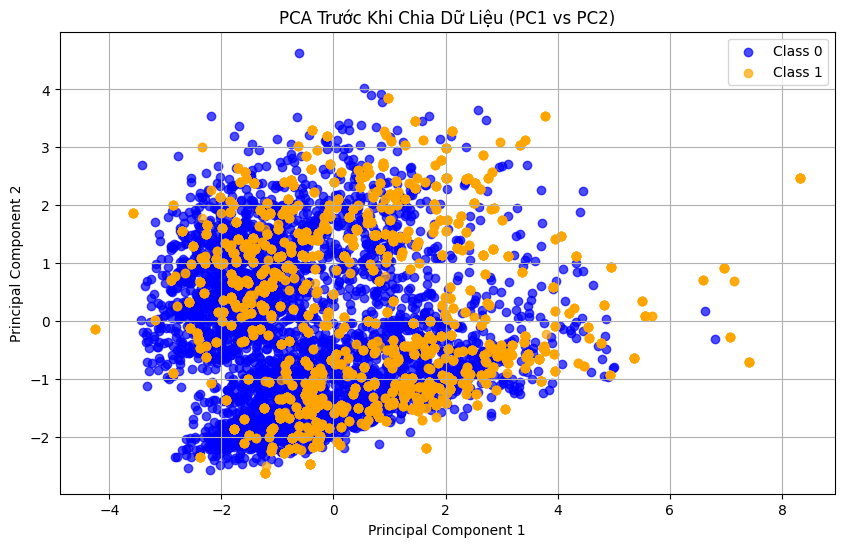

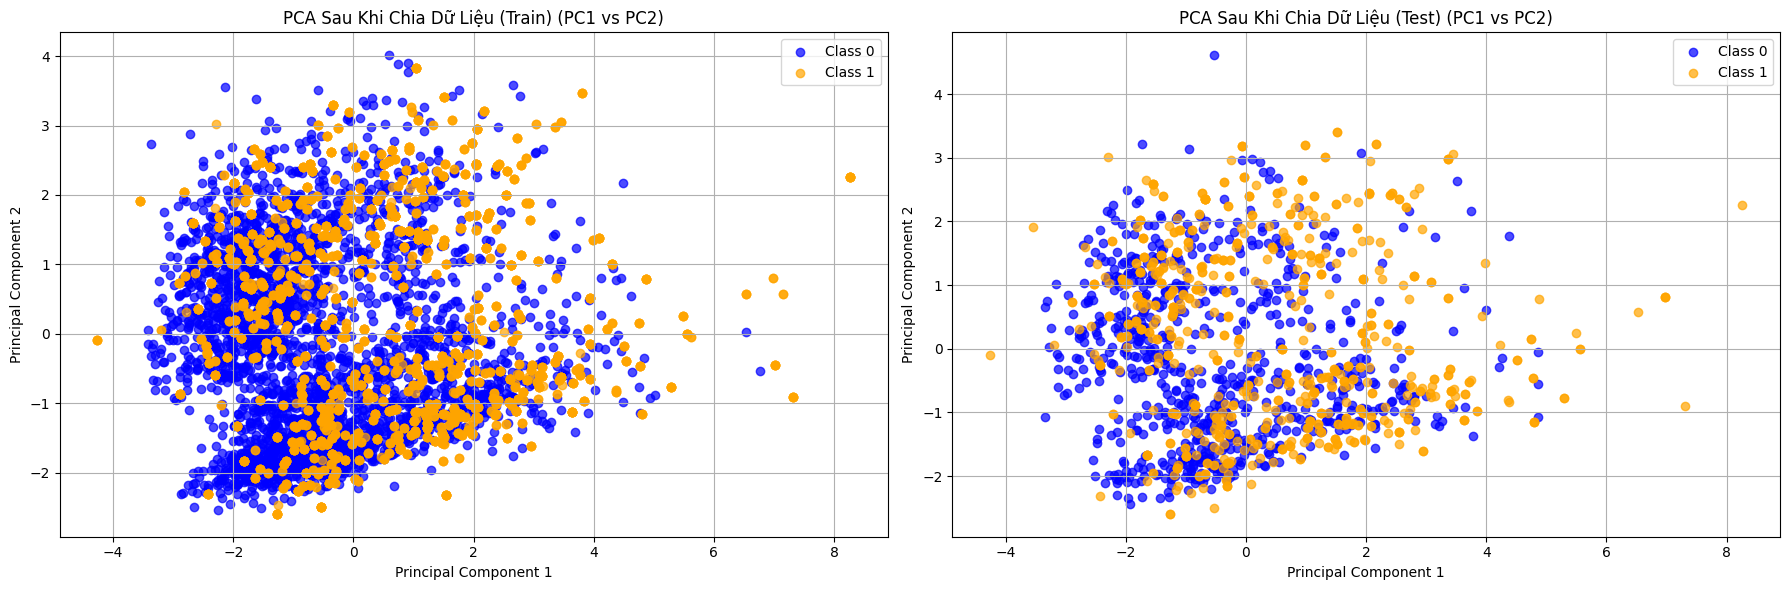

In [2]:
from pca_function import PCA_Processor
processor = PCA_Processor(data_path="../data/framingham.csv", target_column="TenYearCHD", n_components=2)
processor.visualize_pca_2d_cases()

Kết quả thực nghiệm dữ liệu với UMAP

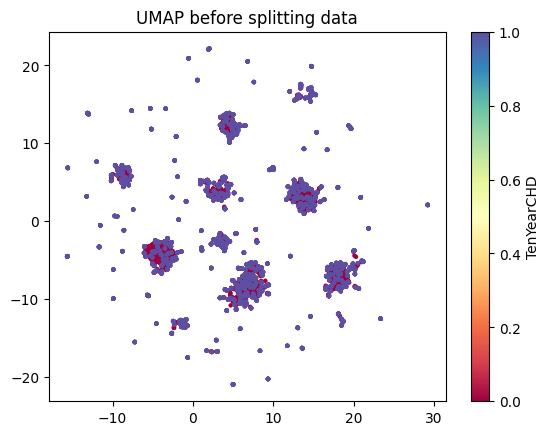

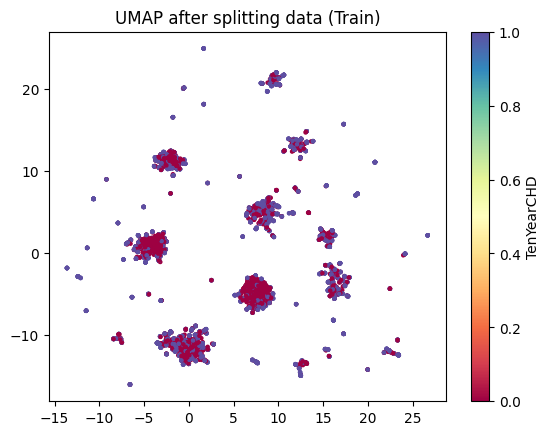

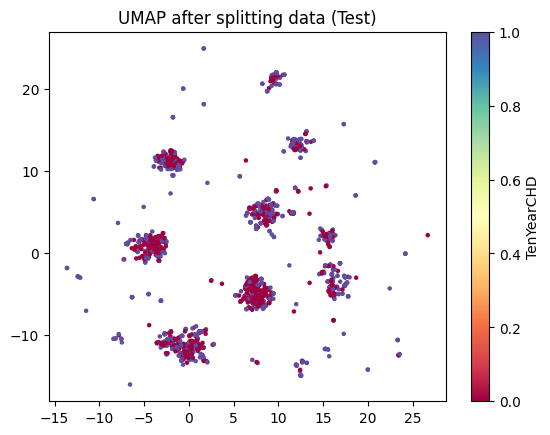

In [3]:
from umap_function import UMAP_Processor

# Khởi tạo đối tượng UMAP_Processor
umap_processor = UMAP_Processor(
    data_path='../data/framingham.csv',  
    target_column='TenYearCHD',   
    n_components=2,  
    test_size=0.2,  
    random_state=42  
)

results_umap_before = umap_processor.apply_umap(before_split=True, classifiers=classifiers)
results_umap_after = umap_processor.apply_umap(before_split=False, classifiers=classifiers) 

Phân cụm với Kmeans

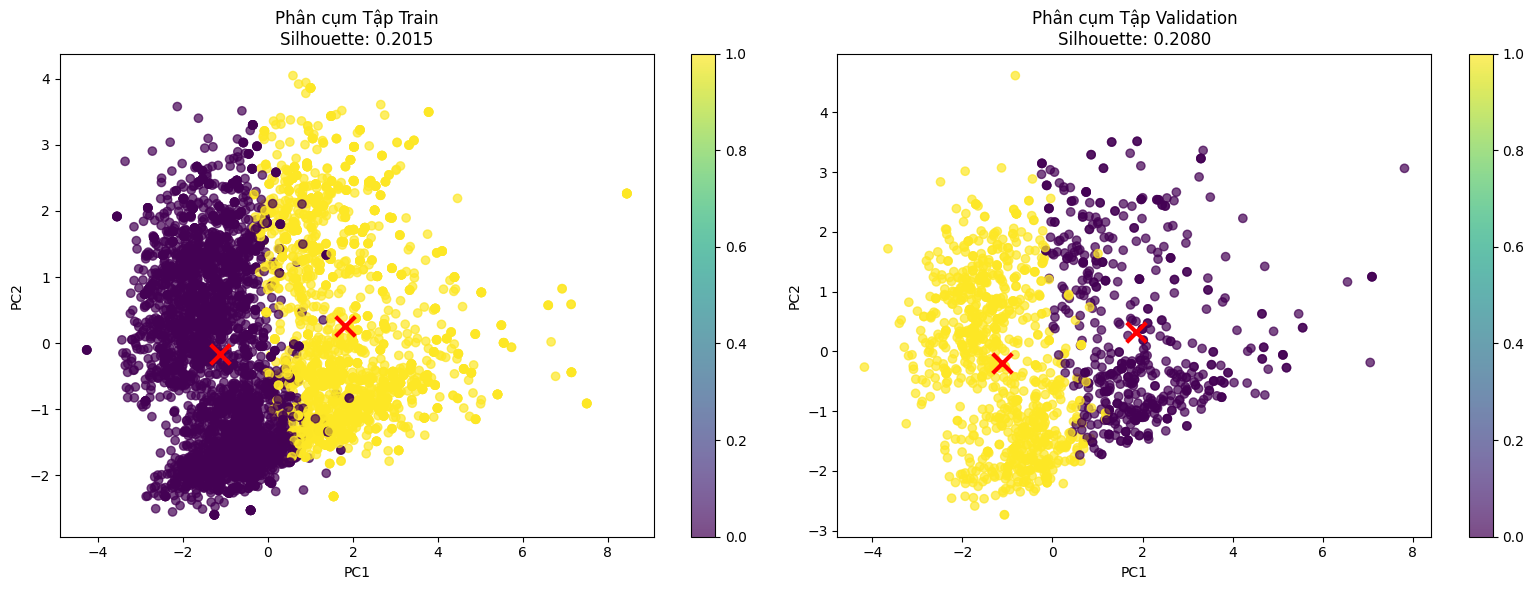

In [6]:
from kmeans_function import KMeansClusterer
def main():
    data_path = '../data/framingham.csv'
    target_column = 'TenYearCHD'
    clusterer = KMeansClusterer(data_path, target_column)
    train_labels, val_labels, kmeans_train, kmeans_val = clusterer.perform_clustering(
        n_clusters=2,   
        save_plot=False  
    )
main()

Training models with PCA

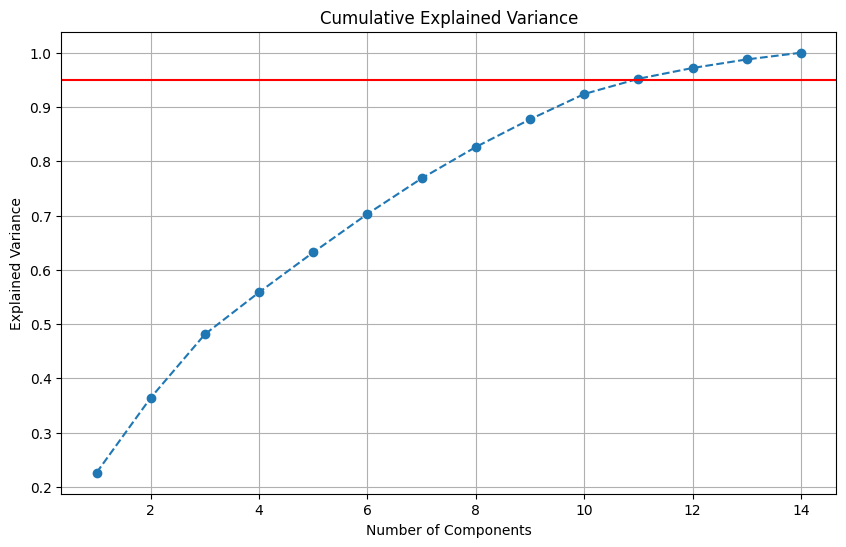

Number of components to retain 95.0% variance: 11
Accuracy KNeighborsClassifier0.7874    

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       735
           1       0.72      0.92      0.81       704

    accuracy                           0.79      1439
   macro avg       0.81      0.79      0.78      1439
weighted avg       0.81      0.79      0.78      1439


Confusion Matrix for KNeighborsClassifier:
[[485 250]
 [ 56 648]]
Accuracy GaussianNB     0.6095    

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       735
           1       0.71      0.34      0.46       704

    accuracy                           0.61      1439
   macro avg       0.64      0.60      0.58      1439
weighted avg       0.64      0.61      0.58      1439


Confusion Matrix for GaussianNB:
[[635 100]
 [462 242]]
Accuracy 

In [4]:
from pca_function import PCA_Processor
from pca_function import print_results

pca_processor = PCA_Processor(
    data_path='../data/framingham.csv',
    target_column='TenYearCHD',
    n_components=2,
    test_size=0.2,
    random_state=42
)

optimal_components = pca_processor.select_pca_components(variance_threshold=0.95)
pca_processor.n_components = optimal_components

results_pca_before = pca_processor.apply_pca_before_split(classifiers)
print_results(results_pca_before)

Training models with UMAP

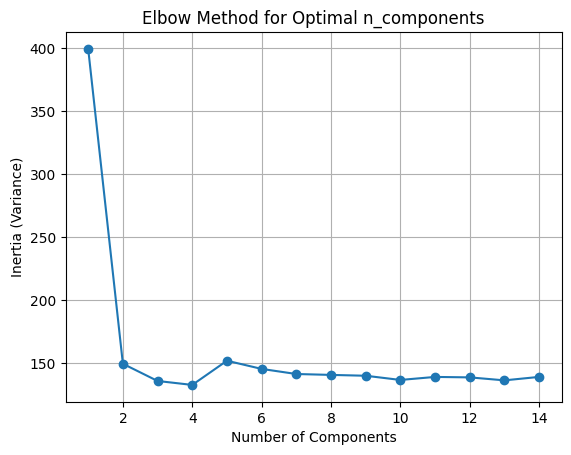

Optimal number of components: 2


Kết quả sau khi áp dụng UMAP
Accuracy KNeighborsClassifier     0.7901    

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.67      0.76       735
           1       0.73      0.92      0.81       704

    accuracy                           0.79      1439
   macro avg       0.81      0.79      0.79      1439
weighted avg       0.81      0.79      0.79      1439


Confusion Matrix for KNeighborsClassifier:
[[490 245]
 [ 57 647]]
Accuracy GaussianNB               0.5956    

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       735
           1       0.63      0.41      0.50       704

    accuracy                           0.60      1439
   macro avg       0.61      0.59      0.58      1439
weighted avg       0.61      0.60      0.58      1439


Confusion Matrix for GaussianNB:
[[56

In [5]:
from umap_function import print_results

results_after_umap = umap_processor.apply_optimal_n_components(classifiers)
print("\n\nKết quả sau khi áp dụng UMAP")
print_results(results_after_umap)